In [1]:
# Restore the case
from os import chdir
chdir('testcase_hires')
from uetools import Case
c = Case('input.yaml') # Create a test at variable "c" from the YAML input file

UEDGE configuration file /Users/holm10/.uetoolsrc read.
UETOOLS-style save successfully restored from /Users/holm10/Documents/fusion/uedge/src/UETOOLS/jupyter/testcase_hires/nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 2.27e+00



Tangential chords treated as pencil-beams!


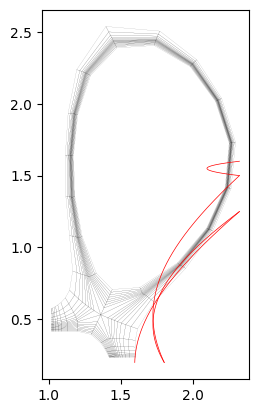

In [2]:
chords = [
    ((2.1, -1, 1.5), (1.5, 1, 0.2)),
    ((2.1, -1, 1.25), (1.5, 1, 0.2)),
    ((2.1, -1, 1.25), (1.5, 0.55, 0.2)),
    ((2.1, -1, 1.6), (2.1, 1, 1.5)),
]

    
tang = c.add_spectrometer("tang", chords=chords)
tang.plot_setup()

No year of ADAS data requested. Using ADAS96.


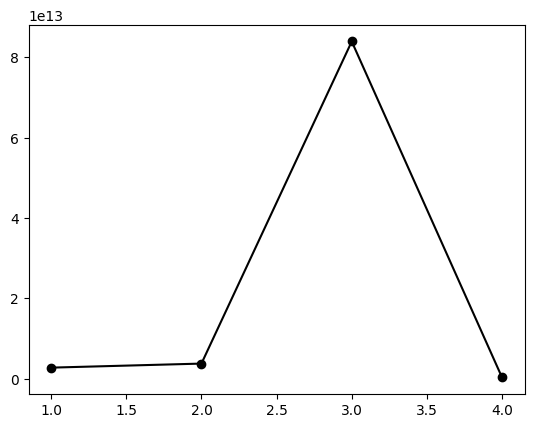

In [3]:
#ax.fill(*tang.grid.area.xy, alpha=0.5, fc='r', ec='none')
tang.add_rates("/Users/holm10/Documents/fusion/uedge/rates/ADAS/", 'h', 'pec')
tang.plot_chord_emission(6561.9, 0);
#tang.grid.area.intersection(tang.chords[0].chord).coords

In [4]:
test_spectro = c.add_spectrometer("testline", width=0.2, omega=None)

In [5]:
test_spectro.add_chord(((1.5, 2.6), (1.5, 0.2)))

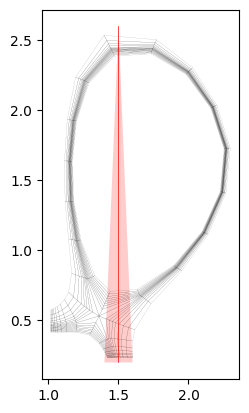

In [6]:
test_spectro.plot_setup()

In [7]:
test_spectro.add_rates("/Users/holm10/Documents/fusion/uedge/rates/ADAS/", "H", 'pec')

No year of ADAS data requested. Using ADAS96.


In [8]:
print("{:.3e}".format(test_spectro.chords[0].integrate_field(test_spectro.get_nph(6561.9, 0))))

1.099e+15


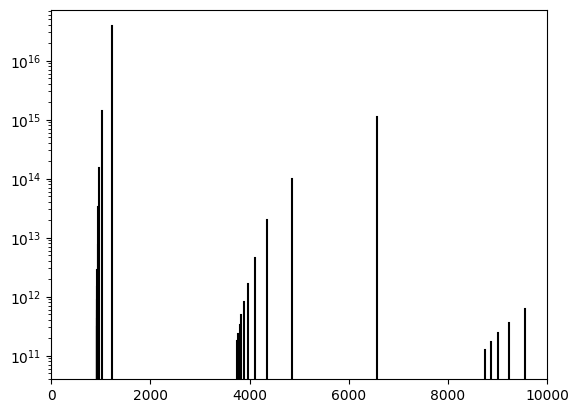

In [9]:
f = test_spectro.plot_chord_spectra(0, 0);
f.get_axes()[0].set_xlim(0,10000);

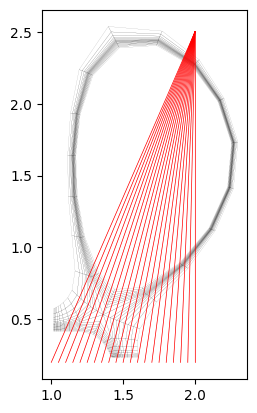

In [10]:
mds = c.add_spectrometer("mds", chords="mds_mockup.dat")
mds.plot_setup()

In [11]:
mds.add_rates("/Users/holm10/Documents/fusion/uedge/rates/ADAS/", "C", 'pec')

No year of ADAS data requested. Using ADAS96.


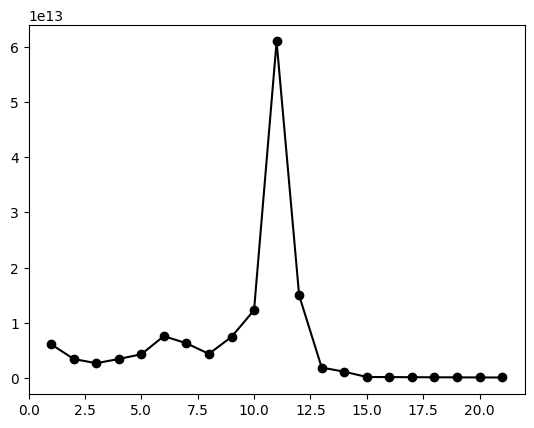

In [12]:
mds.plot_chord_emission(4650.1, 2);

No year of ADAS data requested. Using ADAS96.


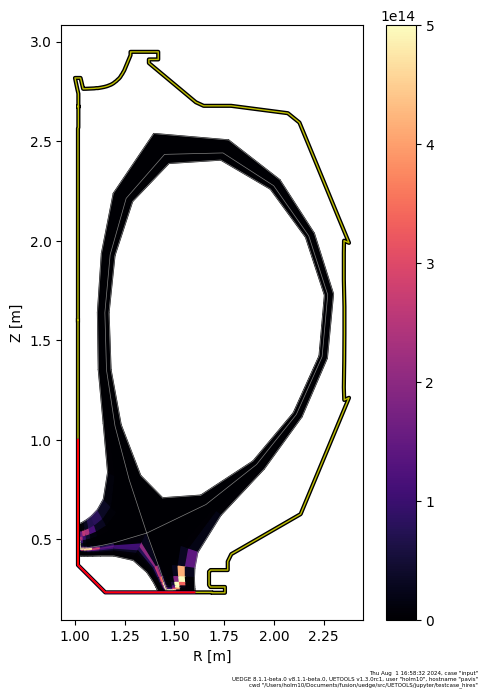

In [13]:
from uetools.UeUtils import ADASSpecies
carbon_rates = ADASSpecies('/Users/holm10/Documents/fusion/uedge/rates/ADAS/', "C", "pec")
CIII_emission = carbon_rates.calc_emission(c.get('ne'), c.get('te'), c.get('ni')[:,:,3], c.get('ni')[:,:,4], c.get('ng')[:,:,0], 2)
c.plot.mesh(CIII_emission[4650.1], zrange=(0,5e14));

6.537e+12 1.383e+13 1.401e+13 5.983e+13 1.437e+13 1.450e+12 1.158e+12 


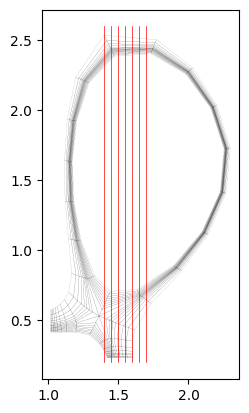

In [14]:

chords = [
    [[1.40, 2.6], [1.40, 0.2]],
    [[1.45, 2.6], [1.45, 0.2]],
    [[1.50, 2.6], [1.50, 0.2]],
    [[1.55, 2.6], [1.55, 0.2]],
    [[1.60, 2.6], [1.60, 0.2]],
    [[1.65, 2.6], [1.65, 0.2]],
    [[1.70, 2.6], [1.70, 0.2]],
    
]
WiSE = c.add_spectrometer("mds", chords=chords)
WiSE.plot_setup();
WiSE.calc_chord_emission(2, rates=carbon_rates, lam=4650.1)
print(("{:.3e} "*len(WiSE.chords)).format(*WiSE.emission[4650.1]))


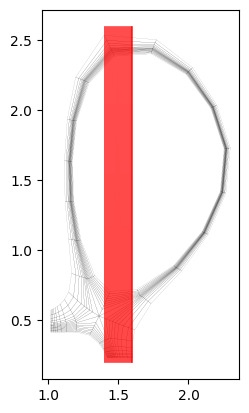

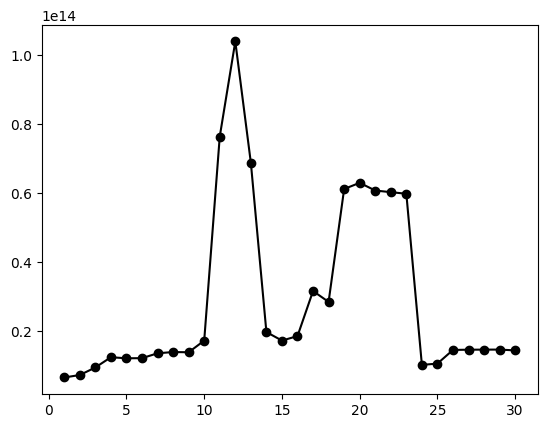

In [15]:

from numpy import linspace

chords = []
for x in linspace(1.4, 1.6, 30):
    chords.append([[x, 2.6], [x, 0.2]])
    
hires_WiSE = c.add_spectrometer("mds", chords=chords);
hires_WiSE.plot_setup();
hires_WiSE.plot_chord_emission(4650.1, 2, rates=carbon_rates);


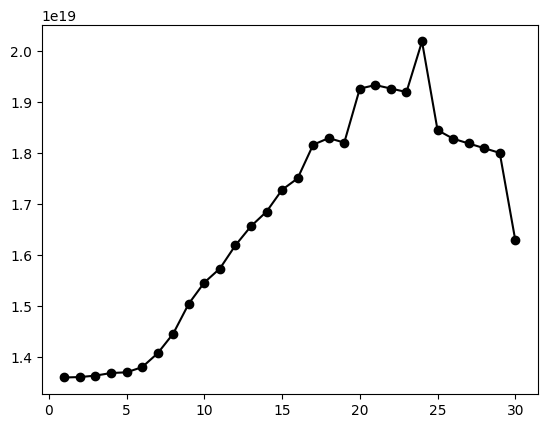

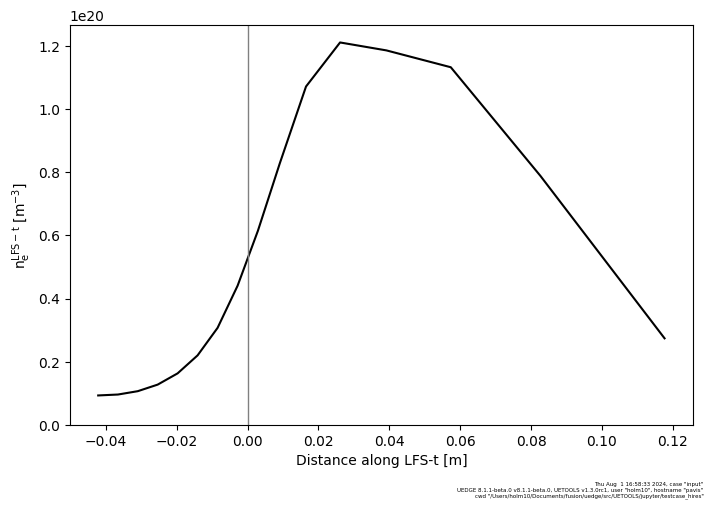

In [16]:
hires_WiSE.plot_chord_integral(c.get('ne'));
c.plot.neOT();